
# Project: Investigate a Dataset from The Movie Database
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Questions">Proposed Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="cleaning">Clean Up Needed</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href-"#sources">Other Resources Consulted</a>
</ul>

<a id='intro'></a>
## Introduction

>This project will involve manipulation and analysis of a larger dataset of movie related information. The data comes from The Movie Database and contains over 10,000 records with a lot of related but varied types of data, including cast lists, financial information, theatrical release dates and run times.


<a id='questions'></a>
## Questions Posed of this Dataset

>Using this dataset I will work to answer the following questions that deal with consumer preferences and evaluating finacial and reviewers scores.
<ol>
    <li> What are top 10 highest rated movies?</li>
    <li>What are the most and least reviewed movies?</li>
    <li> What was the highest and lowest budgeted movie?</li>
    <li>What movie was the highest earning movie?</li>
    <li>What movie had the largest profit?</li>
    </ol>

In [1]:
# Package Imports

import pandas as pd
import numpy as np
from datetime import datetime
import csv
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

>Thinking of the questions I am trying to answer, the data that impacts the answers will be scruntized. The needed columns will be checked for formatting and null or 0 values. I need to ensure all 0 values are omitted as they will skew the calculations when comparing numerical values. Validated the missing, null, or any placeholder type data will help ensure the data is as clean and possible and comparsion can be correctly calculated and used. As the analysis progresses fields or data that is not relevant to the proposed queston will be trimmed and removed for easier manipulation and clearer communication of findings.

### General Properties

In [2]:
# Load data 
all_movies = pd.read_csv('tmdbmovies.csv')

#Print a few lines
all_movies.head(3)



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


In [4]:
all_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Checking the informaton of the set as shown, highlights some issues for clean up. Looking at the total count of records, 10866 and comparing the different columns I see some missing or null data points. The biggest concern so far is with genres having null values as a few of my questions hinge on that data. The columns pertaining to finacial and review information at this point look at least free of null values.

In [5]:
all_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


I ran the describe function as a quick visual check for zero values and other outliers. It appears there are movies with a budget, revenue, or runtime of zero, which logically doesn't make sense for this type of data. I have a few tasks for cleaning the data and getting it into a format I can use.

<a id='cleaning'></a>
### Issues with the Dataset that Require Cleaning

<b>The tasks for cleaning I have identified as follows:</b>
    <ul><li>Remove the unused columns</li>
      <li>Remove any rows with zero values for financial data, budget and revenue</li>
        <li>Correct/Set the format of the financial related colums</li>
        <li>Look for and correct any duplicate entries to ensure I acheive the most accurate results I can</li></ul>
        
    
    
 
    

<h2>Limiting down the Data</h2>
    Columns I am removing include: id, imdb_id, popularity, cast, homepage, director, tagline, keywords, overview, production_companies, release_date, runtime.

In [6]:
#making the list of colums to be removed
remove_clmns=[ 'id', 'imdb_id', 'popularity', 'cast', 'homepage','director', 'genres', 'tagline',  'keywords', 'overview', 'production_companies', 'release_date', 'runtime']

#making a new set incase I have to correct an issue in the original and for clearer communication of what steps and actions I've done so far
trimmed_movies = all_movies.drop(remove_clmns, 1)

#checking the new set
trimmed_movies.head(1)

,budget,revenue,original_title,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,5562,6.5,2015,137999939.3,1.392446e+09


<h2>Removing Records with Bad Financial Information</h2>

  So next I will work on purging rows with missing budget or revenue fields. I'm going to go ahead and get a count of the dataset table so I can tell how the cleanup actions are working.

In [7]:
trimmed_movies.drop_duplicates(keep ='first', inplace=True)
rows, col = trimmed_movies.shape

print('You have {} total entries across {} columns'.format(rows-1, col))
#The header row has to be adjusted from final count as it doesnt contain actual data

You have 10864 total entries across 8 columns


Comparing the count against the original count of the data, it matches so no rows have been removed just yet, but I am about the change that. Numpy has a built in function to drop NA values so I have to set the possible zero values to NaN and then let the function drop those. I think that the adjust budget and revenue values are formulaic to the original budget and revenue values so cleaning those should clean all but I plan to check

In [8]:
# This section will declare a list and then use built in functions to replace the zeros then again to purge the converted NAN values from the list
# this should remove all the rows with bad data
fin_del=['budget', 'revenue']
trimmed_movies[fin_del] = trimmed_movies[fin_del].replace(0, np.NAN)
trimmed_movies.dropna(subset = fin_del, inplace = True)

So I need to get my new count and compare.

In [9]:
rows, col = trimmed_movies.shape
print('After working to remove any row with zeros for the budget or revenue there are {} rows.'.format(rows-1))

After working to remove any row with zeros for the budget or revenue there are 3853 rows.


As you see there was a drastic drop in record counts from 10864 to 3853. Im going to look again for zero min values as a spot check.

In [10]:
trimmed_movies.describe()

,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,3.720370e+07,1.076866e+08,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,4.220822e+07,1.765393e+08,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,1.000000e+00,2.000000e+00,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,1.000000e+07,1.360003e+07,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,2.400000e+07,4.480000e+07,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,5.000000e+07,1.242125e+08,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,4.250000e+08,2.781506e+09,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<h1>SUCCESS!!!!</h1>
There are no minimum values at 0, my code worked to remove them.

<h2>Set Format for the Financial Data</h2>

 Next on my list is moving the budget, revenue, budget_adj, and revenue_adj from floating numbers to integers. 

In [11]:
#using another temporary list, and the applymap function to apply int64 to the existing float types of the columns
defloater=['budget', 'revenue', 'budget_adj', 'revenue_adj''']
trimmed_movies[defloater]=trimmed_movies[defloater].applymap(np.int64)


#checking the change
trimmed_movies.dtypes

budget              int64
revenue             int64
original_title     object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj          int64
revenue_adj         int64
dtype: object

The conversion appears to have worked just fine and our financial relevant columns are now integers.

<h2>Clearing possible duplicates</h2>

 The last clean up task is to just check and remove any possible duplicate rows. Starting out with the 3853 count from the previous tasks.
 
 

In [12]:

trimmed_movies.drop_duplicates(keep ='first', inplace=True)
rows, col = trimmed_movies.shape

print('After all cleaning, there are {} entries'.format(rows-1))

After all cleaning, there are 3853 entries


Better to check for them and find none than risk an impact of the data.

<a id='eda'></a>
## Exploratory Data Analysis

With the wrangling and cleaning tasks successfully complete, its time to attempt to answer the proposed questions.
First lets see what the columns I have left look like in a general sense by plotting a histogram. This gives me an impression of how each column may be skewed and distributed.



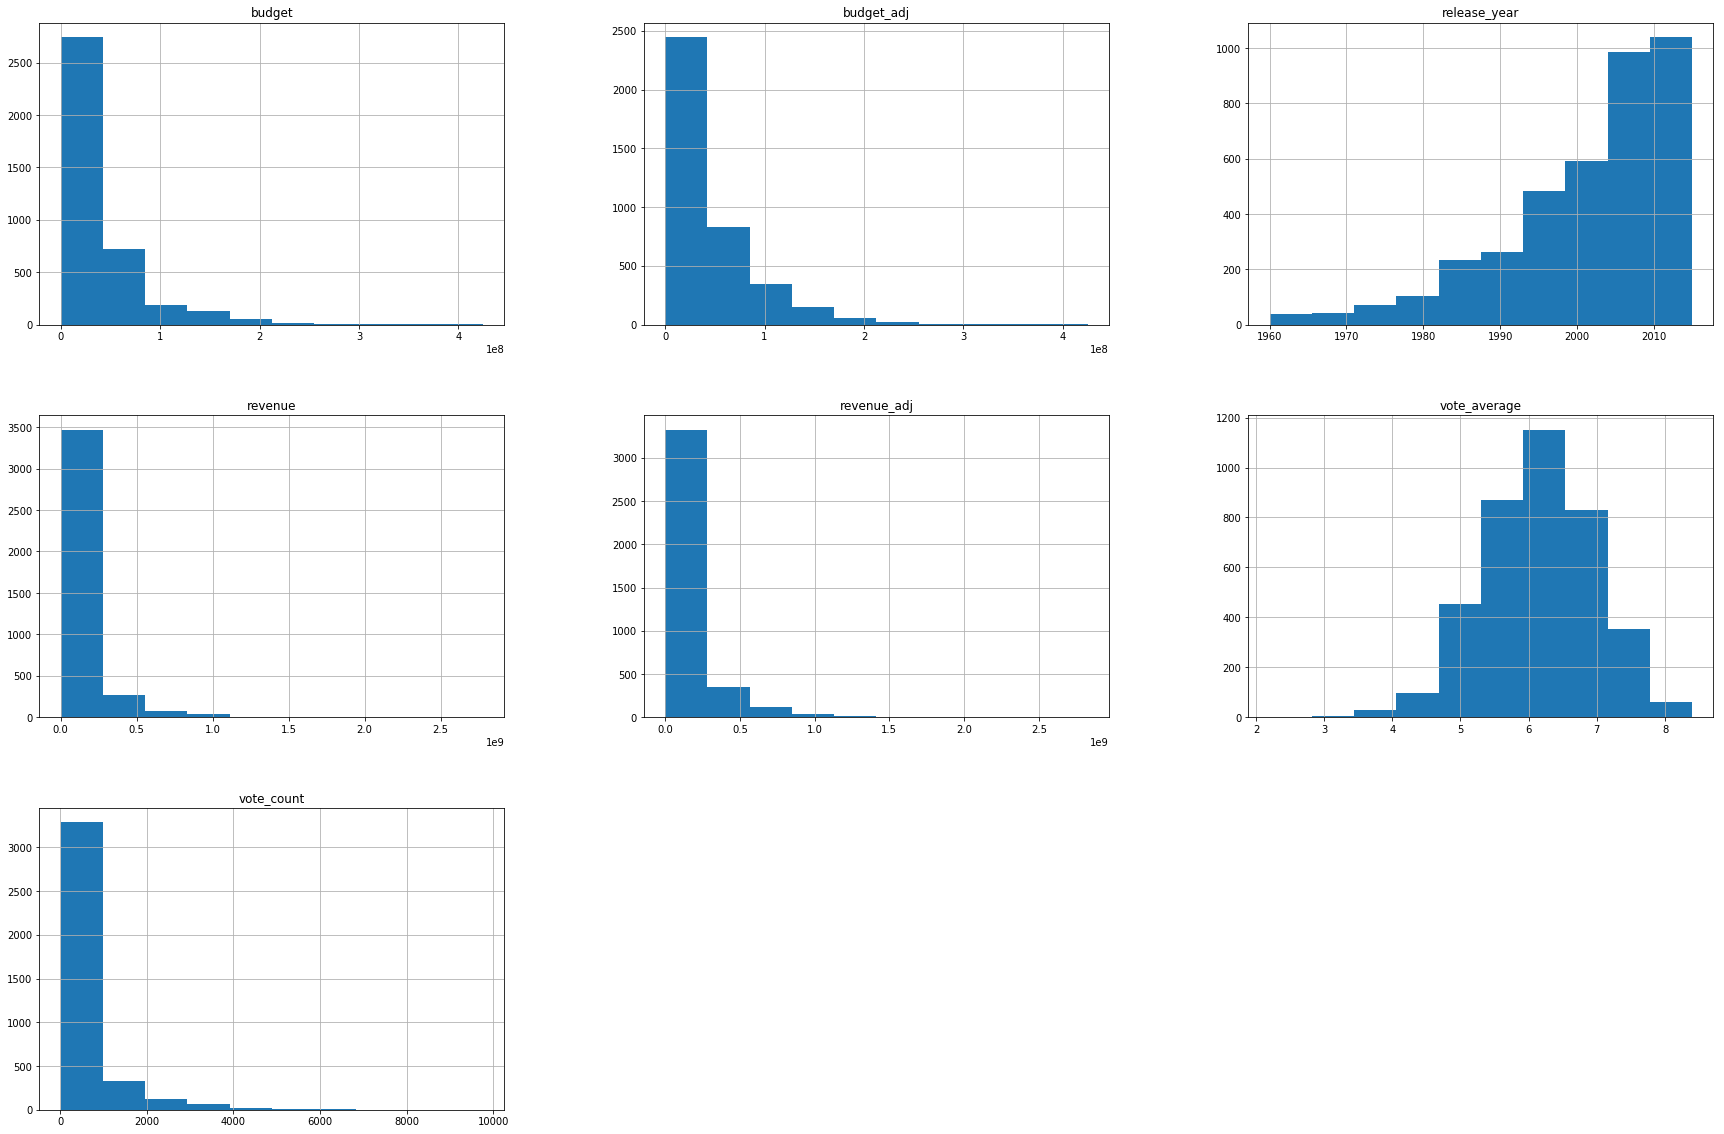

In [13]:
trimmed_movies.hist(figsize=(30, 20));

<h3>Question 1: What are the top 10 highest rated movies? </h3>

In [15]:
#Grouping and sorting the list and slicing at 10 should display the top 10
#Make a ratinglist by sorting on the average vote. Set title to the title of the parent dataset and then print the slice
ratinglist = pd.DataFrame(trimmed_movies['vote_average'].sort_values(ascending = False))
ratinglist['original_title'] = trimmed_movies['original_title']
print ratinglist[:10]

       vote_average            original_title
7948            8.4         Stop Making Sense
4178            8.4  The Shawshank Redemption
7269            8.3             The Godfather
650             8.2                  Whiplash
4179            8.1              Forrest Gump
2875            8.1           The Dark Knight
2409            8.1                Fight Club
9758            8.1    The Godfather: Part II
4177            8.1              Pulp Fiction
10222           8.1          Schindler's List


Text(0.5,0,'Avg Rating')

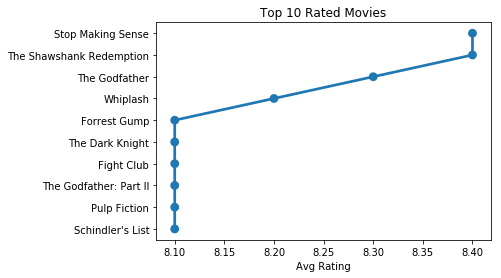

In [16]:
#map a line for the 10 top. Set a sliced list for titles to cap it at 10 then set the axis
t10title = list(map(str,(ratinglist['original_title'])))
x = list(t10title[:10])
y = list(ratinglist['vote_average'][:10])

#make the point plot and setup the title and labels.
lngraph = sns.pointplot(x=y,y=x)
lngraph.set_title("Top 10 Rated Movies")
lngraph.set_xlabel("Avg Rating")

The top 4 movies had unique ratings with at least a 6 place tie for 5th.

<h3>Question 2: What are the most and least reviewed movies?</h3>

Seeing that a few of my questions are similar, if I code a function for highest and lowest I should be able to reuse that. So I do that below to calcuate the most and least voted on movies.

In [17]:
#using and index to find and new variable to set the values wil make this reusable

def high_low(x):
    lowest = trimmed_movies[x].idxmin()
    highest = trimmed_movies[x].idxmax()
    
    #setting a placerholder to store the top and bottom values
    highestmovie = pd.DataFrame(trimmed_movies.loc[highest])
    lowestmovie = pd.DataFrame(trimmed_movies.loc[lowest])

    
    #output strings and a simple table to identify and compare
    print"Highest "+ x + " : ", trimmed_movies['original_title'][highest]
    print"Lowest "+ x + "  : ", trimmed_movies['original_title'][lowest]
    return pd.concat([highestmovie,lowestmovie],axis = 1)

#call the find_minmax function.
high_low('vote_count')

Highest vote_count :  Inception
Lowest vote_count  :  Beautiful


,1919,1818
budget,160000000,1500000
revenue,825500000,56000
original_title,Inception,Beautiful
vote_count,9767,10
vote_average,7.9,4.4
release_year,2010,2009
budget_adj,160000000,1524600
revenue_adj,825500000,56918


<h3>Question 3: What was the highest and lowest budgeted movie?</h3>

Using the previously created function, I'll find the highest and lowest budgeted movie.

In [18]:
high_low('budget')

Highest budget :  The Warrior's Way
Lowest budget  :  Lost & Found


,2244,2618
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
vote_count,74,14
vote_average,6.4,4.8
release_year,2010,1999
budget_adj,425000000,1
revenue_adj,11087569,130


In [19]:
high_low('budget_adj')

Highest budget_adj :  The Warrior's Way
Lowest budget_adj  :  Love, Wedding, Marriage


,2244,3581
budget,425000000,1
revenue,11087569,1378
original_title,The Warrior's Way,"Love, Wedding, Marriage"
vote_count,74,55
vote_average,6.4,5.3
release_year,2010,2011
budget_adj,425000000,0
revenue_adj,11087569,1335


Looking at original budget values and comparing them to adjusted, I see that 'The Warrior's Way' is the overall biggest budget movie, while the lowest changest when comparing adjusted rate costs.

<h3>Question 4: What movie was the highest and least earning movie?</h3>

In [20]:
high_low('revenue')

Highest revenue :  Avatar
Lowest revenue  :  Shattered Glass


,1386,5067
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
vote_count,8458,46
vote_average,7.1,6.4
release_year,2009,2003
budget_adj,240886902,7112115
revenue_adj,2827123750,2


In [21]:
high_low('revenue_adj')

Highest revenue_adj :  Avatar
Lowest revenue_adj  :  Shattered Glass


,1386,5067
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
vote_count,8458,46
vote_average,7.1,6.4
release_year,2009,2003
budget_adj,240886902,7112115
revenue_adj,2827123750,2


Adjusting for like cost amounts had no affect on the highest and lowest revenue generators on the list.

<h3>Question 5: What movie had the largest and smallest profits?</h3>
Profits are not a part of the data set but if I calculate the difference in budget and revenue that should give me the profit or loss the film experienced.

In [22]:
#First thing I need to do is insert a column 
#im going to add both the general and adjusted profit values
trimmed_movies.insert(1,'profit', trimmed_movies['revenue'] - trimmed_movies['budget'])
trimmed_movies.insert(2, 'profit_adj', trimmed_movies['revenue_adj'] - trimmed_movies['budget_adj'])


#checking the columsn
trimmed_movies.head(1)

,budget,profit,profit_adj,revenue,original_title,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1363528810,1254445954,1513528810,Jurassic World,5562,6.5,2015,137999939,1392445893


In [23]:
high_low('profit')


Highest profit :  Avatar
Lowest profit  :  The Warrior's Way


,1386,2244
budget,237000000,425000000
profit,2544505847,-413912431
profit_adj,2586236848,-413912431
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
vote_count,8458,74
vote_average,7.1,6.4
release_year,2009,2010
budget_adj,240886902,425000000
revenue_adj,2827123750,11087569


In [24]:
high_low('profit_adj')


Highest profit_adj :  Star Wars
Lowest profit_adj  :  The Warrior's Way


,1329,2244
budget,11000000,425000000
profit,764398007,-413912431
profit_adj,2750136651,-413912431
revenue,775398007,11087569
original_title,Star Wars,The Warrior's Way
vote_count,4428,74
vote_average,7.9,6.4
release_year,1977,2010
budget_adj,39575591,425000000
revenue_adj,2789712242,11087569


The lowest earner was also the biggest budget listing, which completely explains how it loss money, negative profit

<a id='conclusions'></a>
## Conclusions

The TMDB dataset has a lot of possibilities in comparing various elements that may or not not influece a movies critical or finacial success. The questions I posed were simple comparsions and do not imply any direct correlation between the varying measures of success or scrutiny. This was a exploratory view and manipulation of the data set where I clean up and wrangled the source data, and defined a repeatable function to point of different elements for comparison.

<b>Limitations</b> There are some obvious limitations to the dataset. When purging rows for empty or zero value financial columns more than 50% of the records where removed. This greatly hinders the ability to say the sample represents the population. The data only represents movies from 1960s to 2015 and the adjusted values for revenue and budget were adjusted to 2010 dollar values which means there is an inherit descrepency that may skew the data for movies released after 2010 making them appear to be lower in cost or earnings.


<a id='sources'></a>
## Other Resources Consulted
I did consult some resources outside the Udacity material. I'm still getting comfortable and improving my proficiency in python and especially pandas so I had to refer to a few sources to find the right syntax or methods of completing a function of the libraries.

<a href="https://www.w3schools.com/html/html_lists.asp">HTML Lists - W3Schools</a>

<a href="http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.drop_duplicates.html">Pandas Drop Duplicate Definition</a>

<a href="https://pandas.pydata.org/pandas-docs/stable/10min.html">Pandas 10 minute quick guide</a>

<a href="https://pandas.pydata.org/pandas-docs/stable/.../pandas.DataFrame.dropna.html">Pandas dropNA definition</a>

<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html">ApplyMap Explanation for conversions</a>

<a href="https://www.kaggle.com/aliendev/example-of-pandas-dropna">Another dropNA resource</a>

<a href="https://chrisalbon.com/python/data_wrangling/pandas_with_seaborn">Plotting with seaborn</a>



